In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#train_ds= pd.read_csv("HateSpeech-Article19-Fold1-Train.csv", usecols=["Text","Label"], encoding='latin-1')
train_ds= pd.read_csv("HateSpeech-Article19-Fold1-Train.csv")

In [ ]:
train_ds.head()

,Text,Label
0,மக்கள் விரோத மக்கள் தீய தீய சக்தி திமுக ஆட்சிக...,Lawful
1,Enna da ஜாதி அரசியல் திராவிடம்,Lawful
2,இதற்குப் பெயர்தான் அரசியல் தற்கொலை. பாவம் அந்த...,Lawful
3,Over confident udambuku nallathila sir,Lawful
4,நாம் தமிழர் தான்டா வெற்றி பெரும் வெண்ண,Lawful


In [ ]:
train_ds.sample(frac=1)

,Text,Label
1675,அரசு எழுதிக் கொடுப்பதை எல்லாம் படிக்க வேண்டும்...,Not
106,Podi thevudiya munda,May be Prohibited
2279,நானும் இலங்கை தான் ஆனால் இந்த எழவு கர்மத நாங்...,Must be Prohibited
857,MUTTIPOTTU nadai NADANDHAL<br>AAMBALAI Amavasai,Not
3154,Bro English movie Tamil remake podunga bro,Not
...,...,...
589,பணம் சரியாக கொடுத்துருக்க மாட்டாங்க.அதான் அறிவ...,Not
443,குடும்ப தொலைக்காட்சி சின்ன amount ஆட்கள்,Not
3367,Killi heroine and sister original name please,Not
1004,ஐயாவின் இந்த கருத்தை கொண்டாடுங்கள் நாம் தமிழர்,Not


In [ ]:
train_ds.Label.value_counts()

,count
Label,
Not,3446
Must be Prohibited,191
May be Prohibited,139
Lawful,80


In [ ]:
#test_ds= pd.read_csv("HateSpeech-Article19-Fold1-Test.csv", usecols=["Text","Label"])
test_ds= pd.read_csv("HateSpeech-Article19-Fold1-Test.csv")
test_ds.head()

,Text,Label
0,அதானி 2014 ல் இருந்ததை விட கீழே போக வேண்டும்.<...,Lawful
1,கோமாளி பயலுக கையில் இந்தியா,Lawful
2,நம் நாட்டு மக்கள் ஏமாளி கோமாளி இருக்கும்வரை<br...,Lawful
3,ஜனநாயக நாட்டில் ஒன்றிய அரசின் சர்வாதிகார ஆட்சி...,Lawful
4,இந்தியாவை பற்றிய புரிதலும் ஆர் எஸ் எஸ் மற்றும்...,Lawful


In [ ]:
test_ds.sample(frac=1)

,Text,Label
741,ஆண்டவனிடம் வேண்டுகுறேன் இந்த மாபெரும் மகத்தான ...,Not
720,வாத்தியார் அடி பத்து வருசம் மிலிட்டரில இருந்தே...,Not
34,Comments பார்க்கும்போதே தெரிகிறது சங்கிகளின் I...,May be Prohibited
354,ஃபிராடு பண்ரது கொடுப்பினை என்றால் கடவுள் இருக்...,Not
918,அற்புதமான உரையாடல் சார் அருமையான பதிவு வார்த்த...,Not
...,...,...
463,2G ஊழல் எனச் சொல்லப்பட்டதில் மக்கள் பணம் என்றே...,Not
66,காங்கிரஸ் கட்சி சாவுற கட்சி !! ராகூல் ( அல்...,Must be Prohibited
264,இவர்கள் பிரச்சனையே தாங்கள் வடநாட்டு கட்சி என்ப...,Not
897,Siva Krishna Surya Baala Thangam ithalaam comm...,Not


In [ ]:
test_ds.Label.value_counts()

,count
Label,
Not,862
Must be Prohibited,47
May be Prohibited,34
Lawful,19


In [ ]:
pip install setfit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 7.1 MB/s eta 0:00:00


In [ ]:
import torch
from setfit import SetFitModel
from torch.nn import CrossEntropyLoss
import numpy as np

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
# Original data
docs = train_ds['Text'].to_list()
labels = train_ds['Label'].to_list()

In [ ]:
# Encode class labels to integers
classes = list(set(labels))
class_to_idx = {c: i for i, c in enumerate(classes)}
y = np.array([class_to_idx[l] for l in labels])

In [ ]:
# Compute class weights (inverse frequency)
class_counts = np.bincount(y)
class_weights = torch.tensor(1.0 / class_counts, dtype=torch.float)

In [ ]:
# Define weighted loss
weighted_loss = CrossEntropyLoss(weight=class_weights)

In [ ]:
clf = SetFitModel.from_pretrained("sentence-transformers/LaBSE")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/804 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/461 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.88G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/397 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/114 [00:00<?, ?B/s]

2_Dense/model.safetensors:   0%|          | 0.00/2.36M [00:00<?, ?B/s]

model_head.pkl not found on HuggingFace Hub, initialising classification head with random weights. You should TRAIN this model on a downstream task to use it for predictions and inference.


In [ ]:
# Train with weighted loss
clf.fit(docs, labels, num_epochs=3)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:451: DeprecationWarning: scipy.optimize: The `disp` and `iprint` options of the L-BFGS-B solver are deprecated and will be removed in SciPy 1.18.0.
  opt_res = optimize.minimize(
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
#clf = SetFitClassifier("sentence-transformers/distiluse-base-multilingual-cased")
#clf = SetFitClassifier("sentence-transformers/distiluse-base-multilingual-cased-v1")
#clf = SetFitClassifier("sentence-transformers/distiluse-base-multilingual-cased-v2")
#clf = SetFitClassifier("sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2")
#clf = SetFitClassifier("sentence-transformers/paraphrase-multilingual-mpnet-base-v2")
#clf = SetFitModel("sentence-transformers/LaBSE")
#clf = SetFitClassifier("bert-base-multilingual-cased")
#clf = SetFitClassifier("distilbert-base-cased")

In [ ]:
test1 = test_ds

In [ ]:
test1['predicted'] = clf.predict(test1['Text'].to_list())

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
test1

,Text,Label,predicted
0,அதானி 2014 ல் இருந்ததை விட கீழே போக வேண்டும்.<...,Lawful,Not
1,கோமாளி பயலுக கையில் இந்தியா,Lawful,Not
2,நம் நாட்டு மக்கள் ஏமாளி கோமாளி இருக்கும்வரை<br...,Lawful,Not
3,ஜனநாயக நாட்டில் ஒன்றிய அரசின் சர்வாதிகார ஆட்சி...,Lawful,Not
4,இந்தியாவை பற்றிய புரிதலும் ஆர் எஸ் எஸ் மற்றும்...,Lawful,Not
...,...,...,...
957,இதுபோன்ற நிகழ்ச்சியை பார்த்தாலே மனம்விட்டு சிர...,Not,Not
958,பனிக்கரடி. க்கு( னி ) பணி க்கு இந்த ( ணி ) நீங...,Not,Not
959,நல்ல நிகழ்ச்சி வடிவேல் காமெடி இடைச்செருகல் தே...,Not,Not
960,நன்றாக இருக்கிறது நேரம் போனதே தெரியவில்லை குழந...,Not,Not


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

In [ ]:
print(classification_report(test1['Label'],test1['predicted']))

                    precision    recall  f1-score   support

            Lawful       0.00      0.00      0.00        19
 May be Prohibited       1.00      0.03      0.06        34
Must be Prohibited       0.00      0.00      0.00        47
               Not       0.90      1.00      0.95       862

          accuracy                           0.90       962
         macro avg       0.47      0.26      0.25       962
      weighted avg       0.84      0.90      0.85       962



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/jupyter_c

In [ ]:
cm1 = confusion_matrix(test1['Label'],test1['predicted'])

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
cm1

array([[  0,   0,   0,  19],
       [  0,   1,   0,  33],
       [  0,   0,   0,  47],
       [  0,   0,   1, 861]])

In [ ]:
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


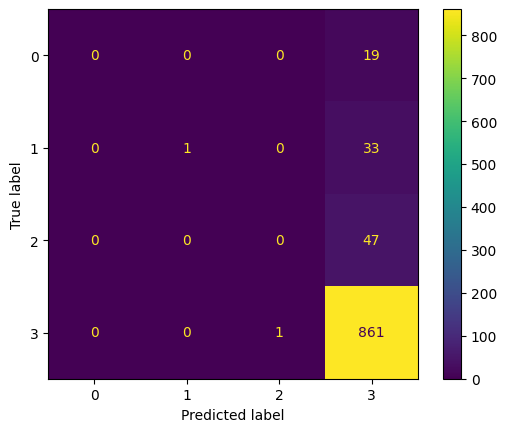

In [ ]:
disp1.plot()

In [ ]:
from setfit import SetFitModel
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = SetFitModel(
    model_body=clf.model_body,
    model_head=LogisticRegression(class_weight="balanced", max_iter=1000),
)

In [ ]:
clf.labels = list(set(labels))
clf.fit(docs, labels, num_epochs=3)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:451: DeprecationWarning: scipy.optimize: The `disp` and `iprint` options of the L-BFGS-B solver are deprecated and will be removed in SciPy 1.18.0.
  opt_res = optimize.minimize(
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
test1 = test_ds

In [ ]:
test1['predicted'] = clf.predict(test1['Text'].to_list())

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
test1

,Text,Label,predicted
0,அதானி 2014 ல் இருந்ததை விட கீழே போக வேண்டும்.<...,Lawful,Lawful
1,கோமாளி பயலுக கையில் இந்தியா,Lawful,May be Prohibited
2,நம் நாட்டு மக்கள் ஏமாளி கோமாளி இருக்கும்வரை<br...,Lawful,Lawful
3,ஜனநாயக நாட்டில் ஒன்றிய அரசின் சர்வாதிகார ஆட்சி...,Lawful,Not
4,இந்தியாவை பற்றிய புரிதலும் ஆர் எஸ் எஸ் மற்றும்...,Lawful,May be Prohibited
...,...,...,...
957,இதுபோன்ற நிகழ்ச்சியை பார்த்தாலே மனம்விட்டு சிர...,Not,Not
958,பனிக்கரடி. க்கு( னி ) பணி க்கு இந்த ( ணி ) நீங...,Not,May be Prohibited
959,நல்ல நிகழ்ச்சி வடிவேல் காமெடி இடைச்செருகல் தே...,Not,Not
960,நன்றாக இருக்கிறது நேரம் போனதே தெரியவில்லை குழந...,Not,Not


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

In [ ]:
print(classification_report(test1['Label'],test1['predicted']))

                    precision    recall  f1-score   support

            Lawful       0.03      0.21      0.05        19
 May be Prohibited       0.09      0.38      0.14        34
Must be Prohibited       0.13      0.32      0.18        47
               Not       0.95      0.62      0.75       862

          accuracy                           0.59       962
         macro avg       0.30      0.38      0.28       962
      weighted avg       0.86      0.59      0.69       962



/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
cm1 = confusion_matrix(test1['Label'],test1['predicted'])

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
cm1

array([[  4,   5,   3,   7],
       [  5,  13,   8,   8],
       [  9,  10,  15,  13],
       [121, 119,  90, 532]])

In [ ]:
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


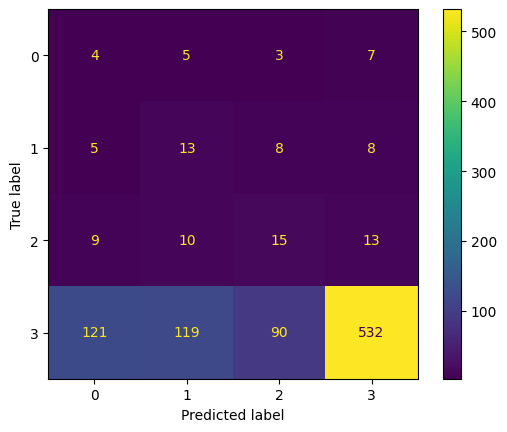

In [ ]:
disp1.plot()

RANDOM FOREST

In [ ]:
from sentence_transformers import SentenceTransformer
text1 = train_ds1['Text'].values.tolist()

In [ ]:
model = SentenceTransformer('sentence-transformers/distiluse-base-multilingual-cased')

In [ ]:
emb = model.encode(text1, batch_size=50, show_progress_bar=True)
emb.shape

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

(160, 512)

In [ ]:
X_train = emb
y_train = train_ds1['Label'].values.tolist()

In [ ]:
from sklearn import preprocessing
from sklearn.metrics import classification_report,confusion_matrix


le = preprocessing.LabelEncoder()
le.fit(test_ds['Label'].tolist())
test_ds ['Label'] = le.transform(test_ds['Label'].tolist())
y_test = test_ds['Label'].values.tolist()



test_text =  test_ds['Text'].values.tolist()
X_test = model.encode(test_text, batch_size=50, show_progress_bar=True)

Batches:   0%|          | 0/12 [00:00<?, ?it/s]

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf1 = RandomForestClassifier(n_estimators = 100)
clf1.fit(X_train, y_train)

y_pred = clf1.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.04      0.31      0.07        16
           1       0.02      0.07      0.03        28
           2       0.08      0.42      0.13        40
           3       0.86      0.19      0.31       476

    accuracy                           0.20       560
   macro avg       0.25      0.25      0.13       560
weighted avg       0.74      0.20      0.27       560



Simple Transformers

In [ ]:
from simpletransformers.classification import ClassificationModel
np.set_printoptions(threshold=np.inf)

In [ ]:
!pip install simpletransformers

Distilbert

In [ ]:
model=ClassificationModel('distilbert','distilbert-base-cased',num_labels=4,use_cuda=False,args={
        "reprocess_input_data" : True,
        "use_cached_eval_features":False,
        "overwrite_output_dir": True,
        "num_train_epochs": 5}
)

In [ ]:
model.train_model(df_train)

In [ ]:
predictions, raw_outputs = model.predict(df_test['text'].tolist())
print(predictions)
print(raw_outputs)

In [ ]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore',category=FutureWarning)
print(classification_report(df_test.Label,predictions))

Roberta

In [ ]:
model = ClassificationModel(
    "roberta",
    "roberta-base",
    num_labels=3,
    weight=[0,1,2],
    use_cuda=False,
    args={
        "reprocess_input_data" : True,
        "use_cached_eval_features":False,
        "overwrite_output_dir": True,
        "num_train_epochs": 1 }

In [ ]:
model.train_model(df_train)

In [ ]:
predictions, raw_outputs = model.predict(df_test['text'].tolist())
print(predictions)
print(raw_outputs)

In [ ]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore',category=FutureWarning)
print(classification_report(df_test.Label,predictions))

mBert

In [ ]:
model=ClassificationModel('bert','bert-base-multilingual-cased',num_labels=3,use_cuda=False,args=model_args)'''
'''{
        "reprocess_input_data" : True,
        "use_cached_eval_features":False,
        "overwrite_output_dir": True,
        "num_train_epochs": 1
        }'

In [ ]:
model.train_model(df_train)

In [ ]:
predictions, raw_outputs = model.predict(df_test['text'].tolist())
print(predictions)
print(raw_outputs)

In [ ]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore',category=FutureWarning)
print(classification_report(df_test.Label,predictions))

Labse

In [ ]:
model=ClassificationModel('bert','setu4993/LaBSE',num_labels=3,use_cuda=False,args=model_args)'''
'''{
        "reprocess_input_data" : True,
        "use_cached_eval_features":False,
        "overwrite_output_dir": True,
        "num_train_epochs": 1
        }'

In [ ]:
model.train_model(df_train)

In [ ]:
predictions, raw_outputs = model.predict(df_test['text'].tolist())
print(predictions)
print(raw_outputs)

In [ ]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore',category=FutureWarning)
print(classification_report(df_test.Label,predictions))